### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando Base de Dados

In [2]:
df = pd.read_csv('../data/netflix1.csv')

### Explorando Base de Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Limpando os Dados

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
df.rename(columns={'date_added':'Date'}, inplace=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


### Visualização

In [10]:
types = df['type'].value_counts().reset_index()
types

,type,count
0,Movie,6126
1,TV Show,2664


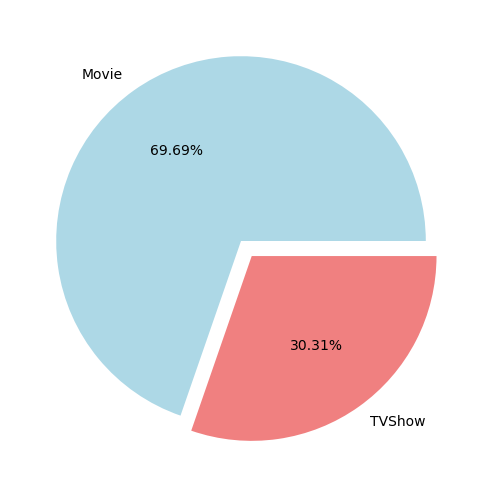

In [11]:
plt.figure(figsize=(20,6))
plt.pie(types['count'], labels=['Movie', 'TVShow'],autopct = '%1.2f%%', explode=[0,0.1], colors= ['lightblue', 'lightcoral'] )
plt.show()

In [12]:
#contando a ocorrência de cada valor único na coluna director e mostrando os 5 primeiros mais recorrentes
df['director'].value_counts().head()

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: count, dtype: int64

In [13]:
not_given_dir = df['director'].value_counts().get('Not Given', 0)
print(not_given_dir)

2588


In [14]:
all_dir = df['director'].value_counts().sum()
given_dir = all_dir - not_given_dir
print(given_dir)

6202


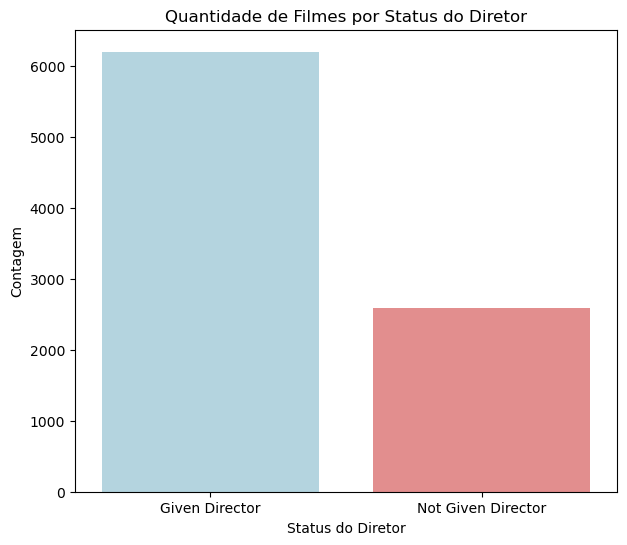

In [15]:
# Quantidade de Filmes por Status do Diretor
counts = pd.DataFrame({
  'director_status': ['Given Director', 'Not Given Director'],
  'count': [given_dir, not_given_dir]
})

plt.figure(figsize=(7,6))
sns.barplot(x = 'director_status', y = 'count', hue = 'director_status',data = counts, palette = ['lightblue', 'lightcoral'])
plt.title('Quantidade de Filmes por Status do Diretor')
plt.xlabel('Status do Diretor')
plt.ylabel('Contagem')
plt.xticks(rotation = 0)
plt.show()

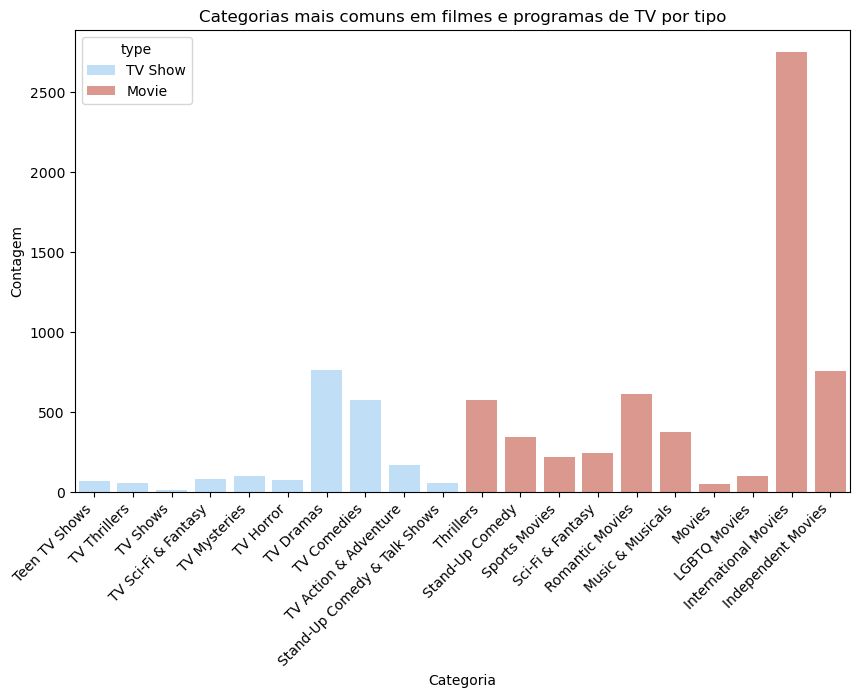

In [16]:
# Top filmes por TVShown e Filme
df_split = df.assign(category = df['listed_in'].str.split(', ')).explode('category')
category_count = df_split.groupby(['type', 'category']).size().reset_index(name='count')
category_count = category_count.sort_values(['type', 'category'], ascending = False)
category_df = category_count.groupby('type').head(10).reset_index(drop = True)

# Gerando Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data= category_df,
    x = 'category',
    y = 'count',
    hue = 'type',
    palette= ['#B7E0FF', '#E78F81']
)
plt.title('Categorias mais comuns em filmes e programas de TV por tipo')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation = 45, ha='right')
plt.show()

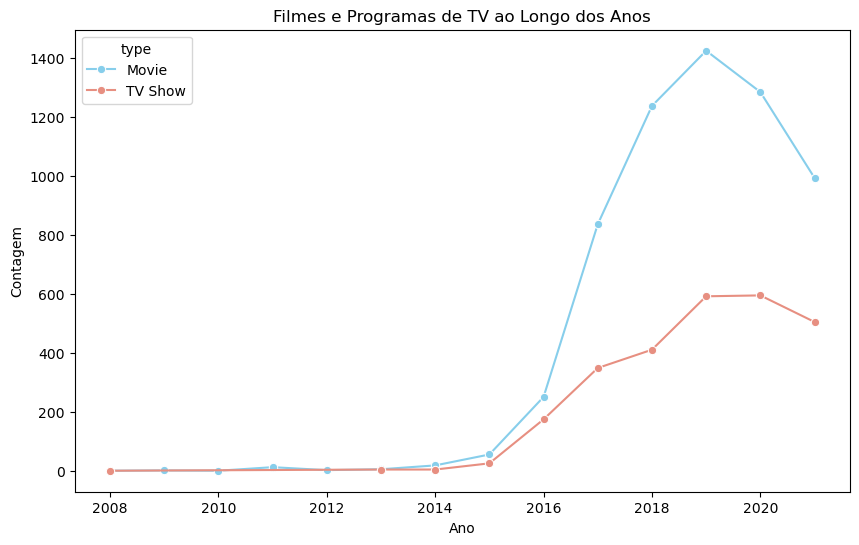

In [17]:
# Tendência anual de lançamentos de filmes e programas de TV
df['year'] = df['Date'].dt.year
cnt_years = df.groupby(['type', 'year']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(
  data = cnt_years,
  x = 'year',
  y = 'count',
  hue = 'type',
  marker='o', 
  palette=['skyblue', '#E78F81']
)
plt.title('Filmes e Programas de TV ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

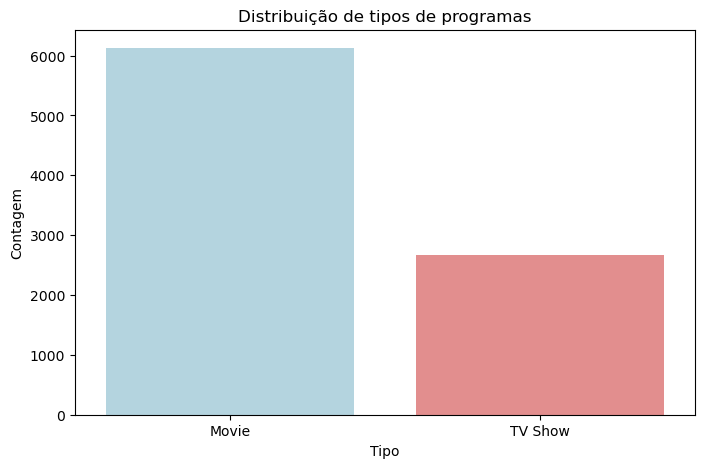

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['type'].value_counts().index, y=df['type'].value_counts().values, hue = df['type'].value_counts().index, palette=['lightblue', 'lightcoral'])
plt.title('Distribuição de tipos de programas')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

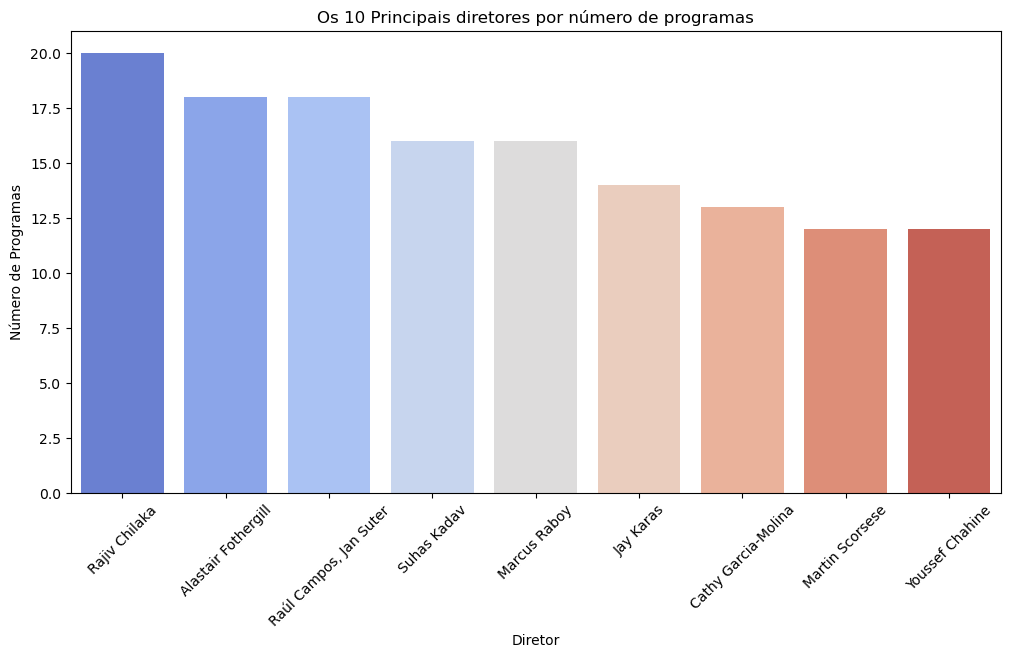

In [22]:
# Top 10 diretores na netflix

top_directors =  df['director'].value_counts()[1:10]
plt.figure(figsize=(12, 6))
sns.barplot(x = top_directors.index, y = top_directors.values, hue = top_directors.index ,palette='coolwarm')
plt.title('Os 10 Principais diretores por número de programas')
plt.xlabel('Diretor')
plt.ylabel('Número de Programas')
plt.xticks(rotation=45)
plt.show()


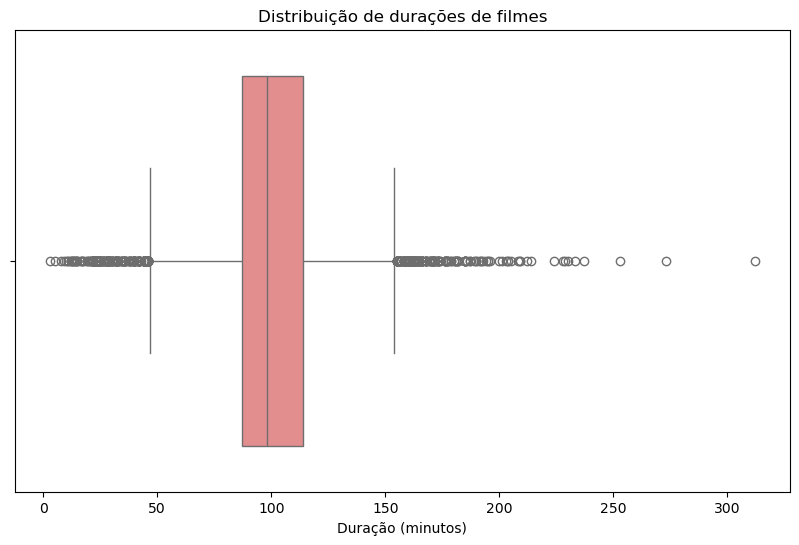

In [24]:
# Duração dos Filmes
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies_df['duration'],color= 'lightcoral')
plt.title('Distribuição de durações de filmes')
plt.xlabel('Duração (minutos)')
plt.show()